# <span style="color:darkred"> Laboratorio di Simulazione Numerica </span>
## <span style="color:darkorange">  Esercitazione 11</span>

## 11.3

Il terzo esercizio richiede di ottimizzare ancora la rete neurale al fine di campionare una funzione con dominio bidimensionale: $f(x,y) = \sin(x^2+y^2)$ con $x \in [-3/2,3/2]$ e $y \in [-3/2,3/2]$. Rispetto alle funzioni precedenti, nel primo *layer* ho impostato *input_shape* $=2$ così da far leggere in *input* alla rete neurale i due parametri del dominio. Alla luce di ciò che ho osservato nell'esercizio precedente, ho deciso di impostare una rete con più *layer*, contenenti via via meno neuroni e con funzioni di attivazione differenti. Il primo *layer* ha funzione di attivazione *tanh* che era risultata più efficiente delle altre. Ho fatto vari tentativi, ma riporto solo il migliore che ho testato. Ho inoltre anche aumentato la dimensione del dataset di *train* impostandolo pari a $6000$, mentre ho impostato quello di *validation* a $600$.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from tensorflow.keras.models import load_model

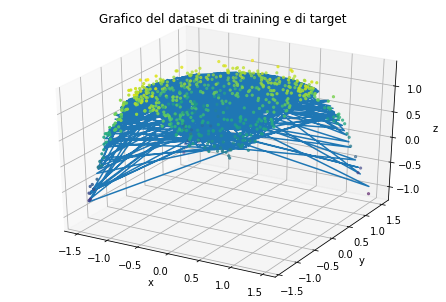


Modello valutato con il set di validation
Test loss: 0.01100879441946745
Test accuracy: 0.01100879441946745

Modello valutato con la curva esatta
Test loss: 0.0029735348653048277
Test accuracy: 0.0029735348653048277


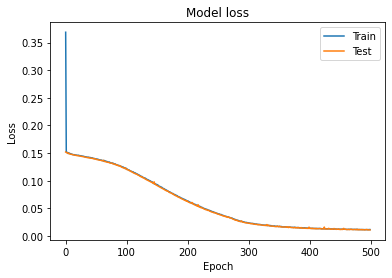

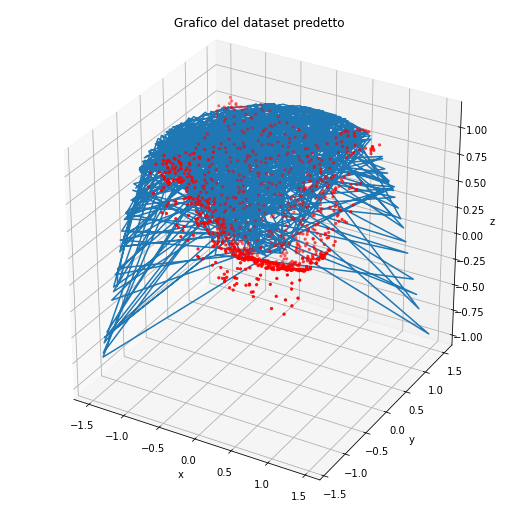

In [46]:
np.random.seed(0)
x_train = np.random.uniform(-1.5, 1.5, (6000, 2))
x_valid = np.random.uniform(-1.5, 1.5, (600, 2))
x_valid.sort()
z_target = np.sin(x_valid[:,0]*x_valid[:,0] + x_valid[:,1]*x_valid[:,1])
 
sigma = 0.1
z_train = np.random.normal(np.sin(x_train[:,0]*x_train[:,0] + x_train[:,1]*x_train[:,1]), sigma)
z_valid = np.random.normal(np.sin(x_valid[:,0]*x_valid[:,0] + x_valid[:,1]*x_valid[:,1]), sigma)

# plot training and target dataset
fig = plt.figure()
plt.suptitle('Grafico del dataset di training e di target')
ax = Axes3D(fig)
ax.plot(x_valid[:,0], x_valid[:,1], z_target)
ax.scatter(x_valid[:,0], x_valid[:,1], z_valid, c=z_valid, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

model = Sequential()

model.add(Dense(30, input_shape=(2,), activation='tanh'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(15, activation='softplus'))
model.add(Dense(1))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

history = model.fit(x_valid, z_valid, 
          batch_size=32, epochs=500,
          shuffle=True,
          validation_data=(x_valid, z_valid), verbose=0)

# evaluate model
score = model.evaluate(x_valid, z_valid, batch_size=32, verbose=0)
print()
print('Modello valutato con il set di validation')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# evaluate model with the exact curve
score = model.evaluate(x_valid, z_target, batch_size=32, verbose=0)
print()
print('Modello valutato con la curva esatta')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

x_predicted = np.random.uniform(-1, 1, (1000, 2))
z_predicted = model.predict(x_predicted)

fig = plt.figure(figsize=(7,7))
plt.suptitle('Grafico del dataset predetto')
ax = Axes3D(fig)
ax.scatter(x_predicted[:,0], x_predicted[:,1], z_predicted, marker='.', color='r')
ax.plot(x_valid[:,0], x_valid[:,1], z_target)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()